In [1]:
!pip install torch torchvision matplotlib opencv-python PyQt5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 16.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
import torch
import torch.nn as nn

# Generator Network (simplified for demonstration)
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()  # Output in range [-1, 1]
        )

    def forward(self, z):
        return self.model(z)


In [9]:
from google.colab import files
uploaded = files.upload()


Saving try on person.jpg to try on person.jpg


In [6]:
import torch
import torch.nn as nn
import numpy as np

# Generator Network (simplified for demonstration)
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()  # Output in range [-1, 1]
        )

    def forward(self, z):
        return self.model(z)


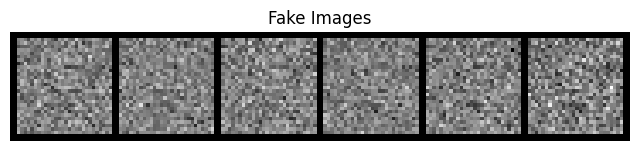

In [7]:
import torchvision.utils as vutils
import matplotlib.pyplot as plt

def generate_fake_images(generator, num_images=6, output_path='fake_images.png'):
    # Generate random noise
    noise = torch.randn(num_images, 100)

    # Generate fake images
    with torch.no_grad():
        fake_images = generator(noise).view(num_images, 1, 28, 28)  # Assuming 28x28 grayscale images

    # Plot and save fake images
    plt.figure(figsize=(8, 6))
    plt.axis("off")
    plt.title("Fake Images")
    plt.imshow(np.transpose(vutils.make_grid(fake_images, padding=2, normalize=True), (1, 2, 0)))
    plt.savefig(output_path)
    plt.show()

# Example usage
generator = Generator()
generate_fake_images(generator, num_images=6, output_path='fake_images.png')


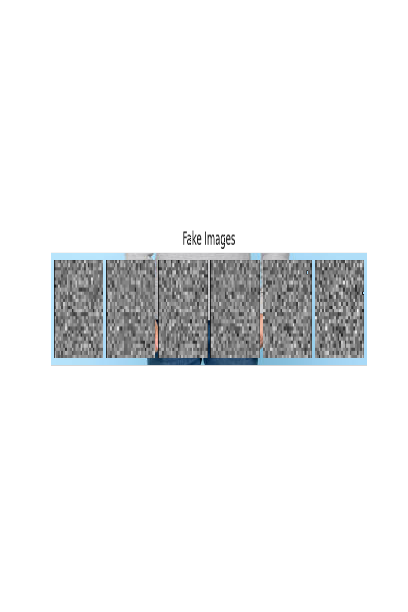

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

def overlay_product(user_photo_path, fake_image_path, output_path='output_image.jpg'):
    # Load user's photo
    user_photo = cv2.imread(user_photo_path)
    if user_photo is None:
        raise ValueError(f"Failed to load image: {user_photo_path}")

    # Load fake image
    fake_image = cv2.imread(fake_image_path)
    if fake_image is None:
        raise ValueError(f"Failed to load image: {fake_image_path}")

    # Resize fake image to fit user's photo (example resizing)
    fake_image_resized = cv2.resize(fake_image, (user_photo.shape[1], user_photo.shape[0]))

    # Convert fake image to grayscale (if needed)
    fake_gray = cv2.cvtColor(fake_image_resized, cv2.COLOR_BGR2GRAY)

    # Threshold the fake image to create a mask
    ret, mask = cv2.threshold(fake_gray, 10, 255, cv2.THRESH_BINARY)

    # Invert the mask
    mask_inv = cv2.bitwise_not(mask)

    # Apply the mask on user's photo to get the background
    user_photo_bg = cv2.bitwise_and(user_photo, user_photo, mask=mask_inv)

    # Extract fake image without background
    fake_fg = cv2.bitwise_and(fake_image_resized, fake_image_resized, mask=mask)

    # Overlay fake image onto user's photo
    combined_image = cv2.add(user_photo_bg, fake_fg)

    # Save the combined image
    cv2.imwrite(output_path, combined_image)

    # Display the combined image (using cv2_imshow instead of cv2.imshow)
    cv2_imshow(combined_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
user_photo_path = 'try on person.jpg'  # Replace with your user's photo path
fake_image_path = 'fake_images.png'  # Replace with your generated fake image path
output_path = 'try_on_result.jpg'  # Replace with your desired output path

try:
    overlay_product(user_photo_path, fake_image_path, output_path)
except ValueError as e:
    print(e)



In [14]:
import torch
from torchvision import datasets, transforms

# Download Fashion MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)


100%|██████████| 26421880/26421880 [00:03<00:00, 7956310.55it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 333452.43it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 1096230.50it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4723753.44it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Epoch [0/10], Step [0/938], Generator Loss: 0.7121, Discriminator Loss: 1.3778
Epoch [0/10], Step [200/938], Generator Loss: 3.7993, Discriminator Loss: 0.5732
Epoch [0/10], Step [400/938], Generator Loss: 6.5649, Discriminator Loss: 0.6340
Epoch [0/10], Step [600/938], Generator Loss: 4.3656, Discriminator Loss: 0.2461
Epoch [0/10], Step [800/938], Generator Loss: 4.4437, Discriminator Loss: 0.1970
Epoch [1/10], Step [0/938], Generator Loss: 3.2712, Discriminator Loss: 0.3332
Epoch [1/10], Step [200/938], Generator Loss: 6.1087, Discriminator Loss: 0.1942
Epoch [1/10], Step [400/938], Generator Loss: 3.9297, Discriminator Loss: 0.5300
Epoch [1/10], Step [600/938], Generator Loss: 5.8738, Discriminator Loss: 0.4876
Epoch [1/10], Step [800/938], Generator Loss: 2.3304, Discriminator Loss: 0.3190
Epoch [2/10], Step [0/938], Generator Loss: 1.9704, Discriminator Loss: 0.2998
Epoch [2/10], Step [200/938], Generator Loss: 4.2856, Discriminator Loss: 0.1315
Epoch [2/10], Step [400/938], Gene

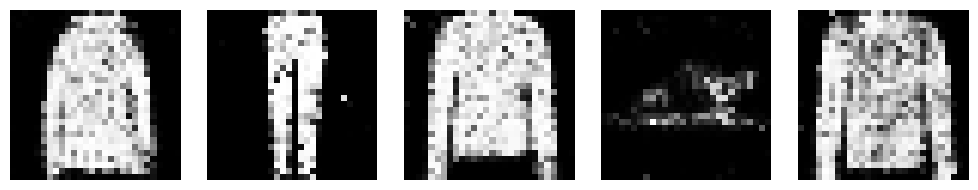

In [18]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Dataset Acquisition (Fashion MNIST as example)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Step 2: Model Architecture (cGAN)
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.fc = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, output_dim)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.relu(self.fc(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.tanh(self.fc4(x))
        return x

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.fc = nn.Linear(input_dim, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# Step 3: Training the cGAN
def train_cgan(generator, discriminator, train_loader, num_epochs=10, z_dim=100, lr=0.0002):
    criterion = nn.BCELoss()
    g_optimizer = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    generator.to(device)
    discriminator.to(device)
    generator.train()
    discriminator.train()

    for epoch in range(num_epochs):
        for i, (real_images, _) in enumerate(train_loader):
            batch_size = real_images.size(0)
            real_images = real_images.view(batch_size, -1).to(device)

            # Train Discriminator
            d_optimizer.zero_grad()
            z = torch.randn(batch_size, z_dim).to(device)
            fake_images = generator(z)
            fake_outputs = discriminator(fake_images)
            real_outputs = discriminator(real_images)

            d_loss = criterion(fake_outputs, torch.zeros_like(fake_outputs)) + \
                     criterion(real_outputs, torch.ones_like(real_outputs))
            d_loss.backward()
            d_optimizer.step()

            # Train Generator
            g_optimizer.zero_grad()
            z = torch.randn(batch_size, z_dim).to(device)
            fake_images = generator(z)
            fake_outputs = discriminator(fake_images)

            g_loss = criterion(fake_outputs, torch.ones_like(fake_outputs))
            g_loss.backward()
            g_optimizer.step()

            # Print losses
            if i % 200 == 0:
                print(f"Epoch [{epoch}/{num_epochs}], Step [{i}/{len(train_loader)}], "
                      f"Generator Loss: {g_loss.item():.4f}, Discriminator Loss: {d_loss.item():.4f}")

# Step 4: Virtual Try-On Functionality
def virtual_try_on(generator, num_samples=5, z_dim=100):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    generator.to(device)
    generator.eval()

    with torch.no_grad():
        z = torch.randn(num_samples, z_dim).to(device)
        fake_images = generator(z)
        fake_images = fake_images.view(-1, 28, 28).cpu().numpy()

    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(fake_images[i], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Step 5: Main Execution (Training and Testing)
if __name__ == '__main__':
    z_dim = 100  # Dimensionality of the input noise vector
    generator = Generator(input_dim=z_dim, output_dim=28*28)
    discriminator = Discriminator(input_dim=28*28)
    train_cgan(generator, discriminator, train_loader)
    virtual_try_on(generator)


In [24]:
import os
os.makedirs('models', exist_ok=True)
torch.save(generator.state_dict(), 'models/generator.pth')
torch.save(discriminator.state_dict(), 'models/discriminator.pth')
print("Models saved!")

Models saved!


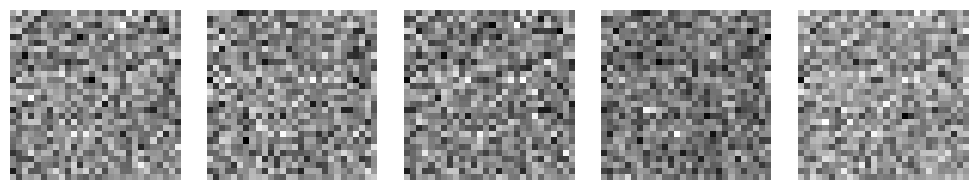

In [25]:
# Load the saved models
def load_models(generator_path='models/generator.pth', discriminator_path='models/discriminator.pth', z_dim=100):
    generator = Generator(input_dim=z_dim, output_dim=28*28)
    discriminator = Discriminator(input_dim=28*28)

    generator.load_state_dict(torch.load(generator_path))
    discriminator.load_state_dict(torch.load(discriminator_path))

    return generator, discriminator

# Example usage of loading models
if __name__ == '__main__':
    z_dim = 100  # Dimensionality of the input noise vector
    generator, discriminator = load_models()
    virtual_try_on(generator)


In [29]:
def virtual_try_on(generator, num_samples=5, z_dim=100):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    generator.to(device)
    generator.eval()

    with torch.no_grad():
        z = torch.randn(num_samples, z_dim).to(device)
        fake_images = generator(z)
        fake_images = fake_images.view(-1, 28, 28).cpu().numpy()

    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(fake_images[i], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [30]:
def load_models(generator_path='models/generator.pth', discriminator_path='models/discriminator.pth', z_dim=100):
    generator = Generator(input_dim=z_dim, output_dim=28*28)
    discriminator = Discriminator(input_dim=28*28)

    generator.load_state_dict(torch.load(generator_path))
    discriminator.load_state_dict(torch.load(discriminator_path))

    return generator, discriminator

In [34]:
# Function to overlay product image onto user image
def overlay_product(user_image_path, product_image_path, output_path):
    user_image = cv2.imread(user_image_path)
    product_image = cv2.imread(product_image_path, cv2.IMREAD_UNCHANGED)

    # Ensure the product image has an alpha channel
    if product_image.shape[2] != 4:
        print("Product image does not have an alpha channel.")
        return

    # Resize product image to fit user's photo (example resizing)
    product_image_resized = cv2.resize(product_image, (user_image.shape[1], user_image.shape[0]))

    # Create a mask using the alpha channel
    alpha_mask = product_image_resized[:, :, 3] / 255.0
    alpha_mask_inv = 1.0 - alpha_mask

    # Split the user and product images into their respective channels
    user_b, user_g, user_r = cv2.split(user_image)
    prod_b, prod_g, prod_r, _ = cv2.split(product_image_resized)

    # Blend the images using the alpha mask
    blended_b = (user_b * alpha_mask_inv + prod_b * alpha_mask).astype(np.uint8)
    blended_g = (user_g * alpha_mask_inv + prod_g * alpha_mask).astype(np.uint8)
    blended_r = (user_r * alpha_mask_inv + prod_r * alpha_mask).astype(np.uint8)

    # Merge the blended channels back together
    blended_image = cv2.merge([blended_b, blended_g, blended_r])

    cv2.imwrite(output_path, blended_image)

In [35]:
def perform_virtual_try_on(user_image_path, product_image_path, generator_path='models/generator.pth', output_path='try_on_result.jpg'):
    z_dim = 100
    generator = Generator(input_dim=z_dim, output_dim=28*28)
    generator.load_state_dict(torch.load(generator_path))
    generator.eval()

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    generator.to(device)

    with torch.no_grad():
        z = torch.randn(1, z_dim).to(device)
        fake_image = generator(z).view(28, 28).cpu().numpy()

    # Convert the generated image to 3 channels
    fake_image = np.stack((fake_image,) * 3, axis=-1)

    # Save the virtual try-on image
    overlay_product(user_image_path, product_image_path, output_path)
    print(f"Virtual try-on result saved to {output_path}")

In [33]:
user_image_path = 'try on person.jpg'  # Path to user image
perform_virtual_try_on(user_image_path)

Virtual try-on result saved to try_on_result.jpg


In [41]:
# Upload user and product images
print("Please upload the user image:")
uploaded = files.upload()
user_image_path = list(uploaded.keys())[0]

print("Please upload the product image:")
uploaded = files.upload()
product_image_path = list(uploaded.keys())[0]

# Example of performing virtual try-on
perform_virtual_try_on(user_image_path, product_image_path)

Please upload the user image:


Saving try on person.jpg to try on person (6).jpg
Please upload the product image:


Saving images.png to images.png
Virtual try-on result saved to try_on_result.jpg


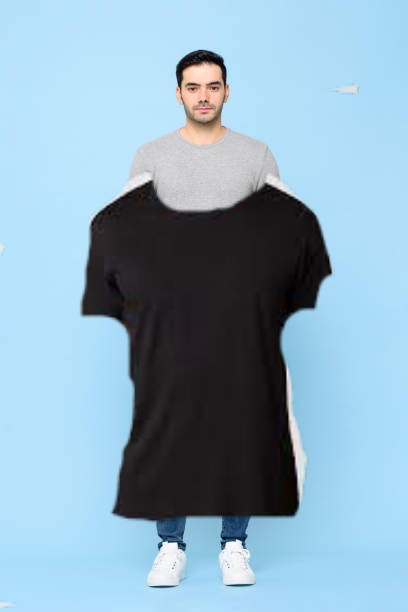

In [42]:
from IPython.display import Image
Image('try_on_result.jpg')

Note: The tshirt doesn't fit the person exactly, fixing this would require complex models
